<a href="https://colab.research.google.com/github/GabrielIcai/AI-Genre-Detector-LSTM/blob/main/Examen_Final_VisualizacionD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Examen final de Desarrollo de Aplicaciones para la Visualización de Datos**



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

import statsmodels.api as sm


In [4]:
df = pd.read_csv("medical_insurance.csv")

print(df.head())
print(df.info())
print(df.describe())

   person_id  age     sex   region urban_rural   income     education  \
0      75722   52  Female    North    Suburban  22700.0     Doctorate   
1      80185   79  Female    North       Urban  12800.0         No HS   
2      19865   68    Male    North       Rural  40700.0            HS   
3      76700   15    Male    North    Suburban  15600.0  Some College   
4      92992   53    Male  Central    Suburban  89600.0     Doctorate   

  marital_status employment_status  household_size  ...  liver_disease  \
0        Married           Retired               3  ...              0   
1        Married          Employed               3  ...              0   
2        Married           Retired               5  ...              0   
3        Married     Self-employed               5  ...              0   
4        Married     Self-employed               2  ...              0   

   arthritis mental_health proc_imaging_count  proc_surgery_count  \
0          1             0                  1  

In [5]:
#LIMPIEZA
for col in df.columns:
    if df[col].dtype == object and df[col].nunique() == 2:
        df[col] = df[col].map({"yes":1, "no":0, "Yes":1, "No":0})
if df["is_high_risk"].dtype == bool:
    df["is_high_risk"] = df["is_high_risk"].astype(int)
df = df.fillna(df.median(numeric_only=True))


# **Análisis exploratorio con clusterización (mínimo 6 gráficos)**

Coste Médico anual según edad, región y sexo

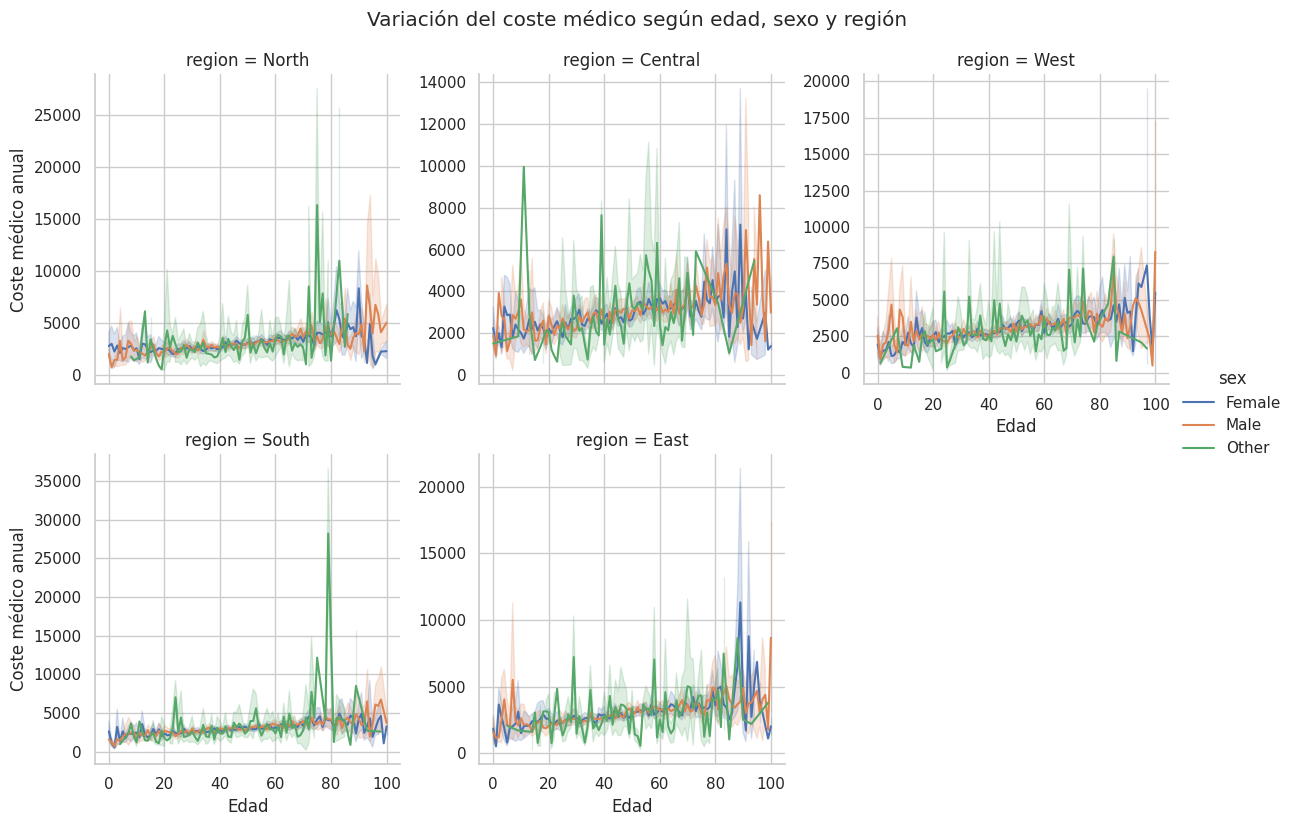

In [11]:
sns.set(style="whitegrid")

g = sns.FacetGrid(df, col="region", hue="sex", col_wrap=3, height=4, sharey=False)
g.map(sns.lineplot, "age", "annual_medical_cost")
g.add_legend()

g.set_axis_labels("Edad", "Coste médico anual")
plt.suptitle("Variación del coste médico según edad, sexo y región", y=1.03)
plt.show()


¿Qué relación existe entre hábitos de vida (bmi, smoker, alcohol_freq…) y el coste médico anual?

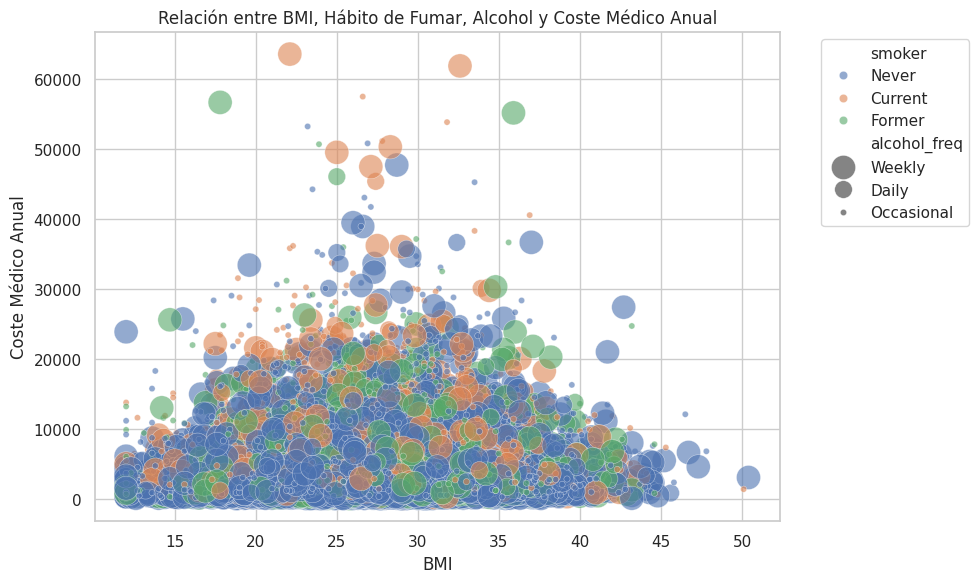

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

sns.scatterplot(
    data=df,
    x="bmi",
    y="annual_medical_cost",
    hue="smoker",
    size="alcohol_freq",
    sizes=(20, 300),
    alpha=0.6
)

plt.title("Relación entre BMI, Hábito de Fumar, Alcohol y Coste Médico Anual")
plt.xlabel("BMI")
plt.ylabel("Coste Médico Anual")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()


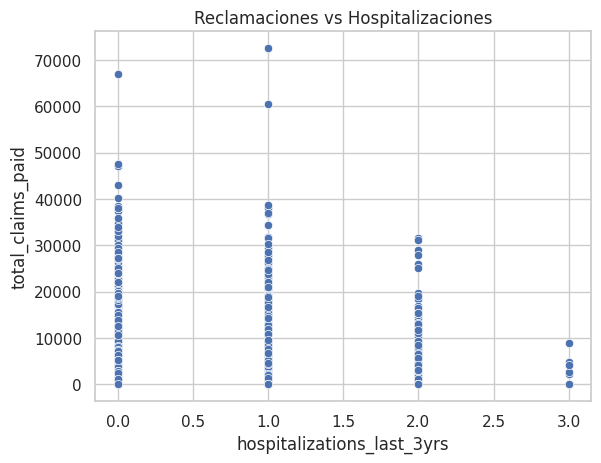

In [13]:
sns.scatterplot(data=df, x="hospitalizations_last_3yrs", y="total_claims_paid")
plt.title("Reclamaciones vs Hospitalizaciones")
plt.show()


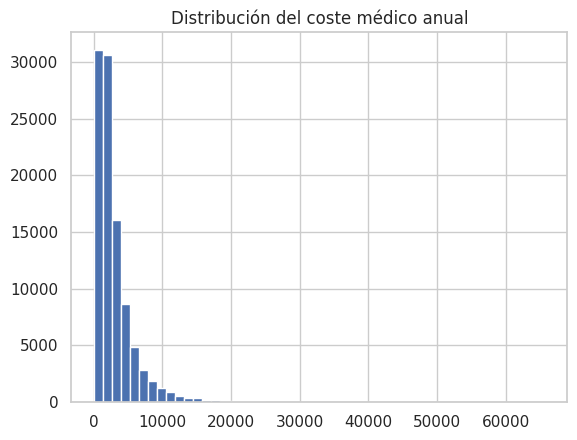

In [16]:
df["annual_medical_cost"].hist(bins=50)
plt.title("Distribución del coste médico anual")
plt.show()


# CLUSTERS

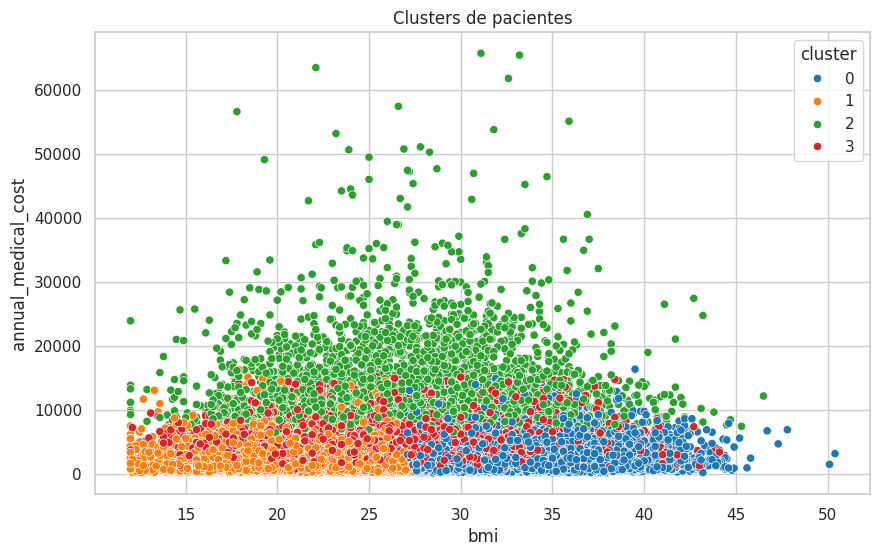

In [60]:
cluster_vars = ["age","bmi","chronic_count","annual_medical_cost","total_claims_paid"]
df_cluster = df[cluster_vars]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

kmeans = KMeans(n_clusters=4, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)
sns.scatterplot(data=df, x="bmi", y="annual_medical_cost", hue="cluster", palette="tab10")
plt.title("Clusters de pacientes")
plt.show()

In [17]:
chronic_disease_cols = ['hypertension', 'diabetes', 'asthma', 'copd', 'cardiovascular_disease', 'cancer_history', 'kidney_disease', 'liver_disease', 'arthritis', 'mental_health']

print("Chronic Disease Columns and their unique values:")
for col in chronic_disease_cols:
    print(f"\nColumn '{col}':")
    print(df[col].value_counts())


Chronic Disease Columns and their unique values:

Column 'hypertension':
hypertension
0    79655
1    20345
Name: count, dtype: int64

Column 'diabetes':
diabetes
0    91407
1     8593
Name: count, dtype: int64

Column 'asthma':
asthma
0    94113
1     5887
Name: count, dtype: int64

Column 'copd':
copd
0    96405
1     3595
Name: count, dtype: int64

Column 'cardiovascular_disease':
cardiovascular_disease
0    94883
1     5117
Name: count, dtype: int64

Column 'cancer_history':
cancer_history
0    97849
1     2151
Name: count, dtype: int64

Column 'kidney_disease':
kidney_disease
0    98538
1     1462
Name: count, dtype: int64

Column 'liver_disease':
liver_disease
0    98523
1     1477
Name: count, dtype: int64

Column 'arthritis':
arthritis
0    89169
1    10831
Name: count, dtype: int64

Column 'mental_health':
mental_health
0    86986
1    13014
Name: count, dtype: int64


In [18]:
average_costs_per_disease = {}

for disease_col in chronic_disease_cols:
    patients_with_disease = df[df[disease_col] == 1]
    if not patients_with_disease.empty:
        average_cost = patients_with_disease['annual_medical_cost'].mean()
        average_costs_per_disease[disease_col] = average_cost
    else:
        average_costs_per_disease[disease_col] = 0
print("Average annual medical cost per chronic disease:")
for disease, cost in average_costs_per_disease.items():
    print(f"  {disease.replace('_', ' ').title()}: ${cost:,.2f}")


Average annual medical cost per chronic disease:
  Hypertension: $3,964.35
  Diabetes: $4,104.67
  Asthma: $4,020.19
  Copd: $4,140.57
  Cardiovascular Disease: $4,066.83
  Cancer History: $4,173.55
  Kidney Disease: $4,082.67
  Liver Disease: $4,306.03
  Arthritis: $4,044.77
  Mental Health: $4,030.10


/tmp/ipython-input-382512038.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diseases, y=costs, palette='viridis')


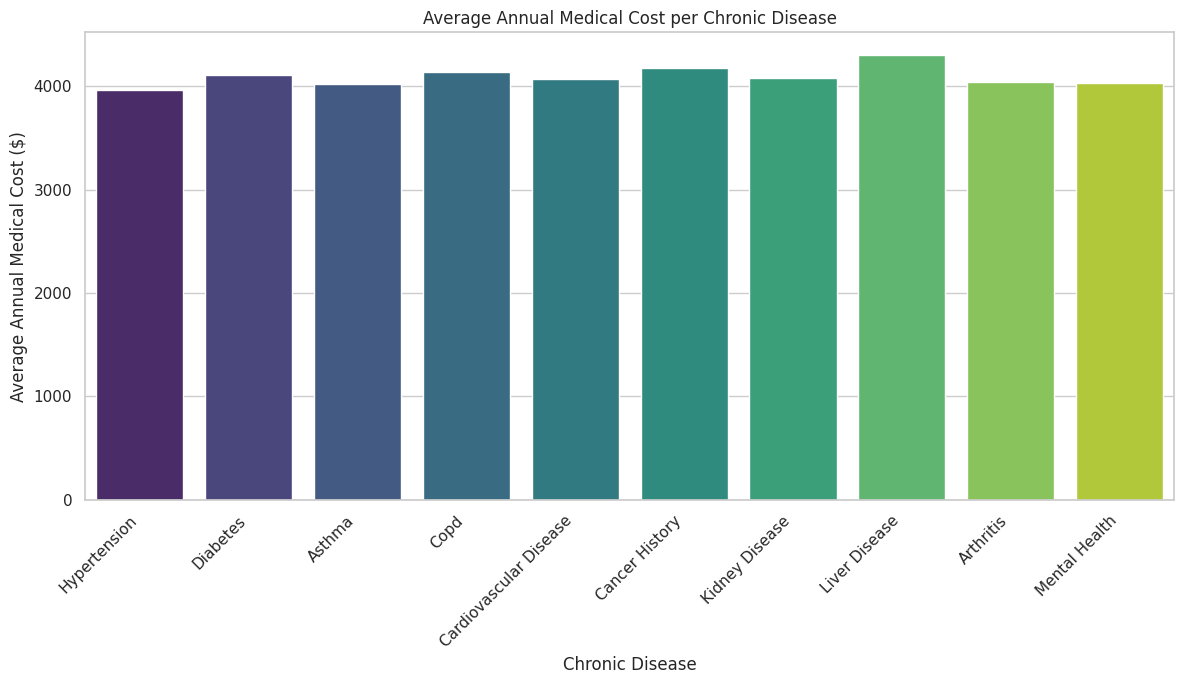

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

diseases = [disease.replace('_', ' ').title() for disease in average_costs_per_disease.keys()]
costs = list(average_costs_per_disease.values())

plt.figure(figsize=(12, 7))
sns.barplot(x=diseases, y=costs, palette='viridis')
plt.title('Average Annual Medical Cost per Chronic Disease')
plt.xlabel('Chronic Disease')
plt.ylabel('Average Annual Medical Cost ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

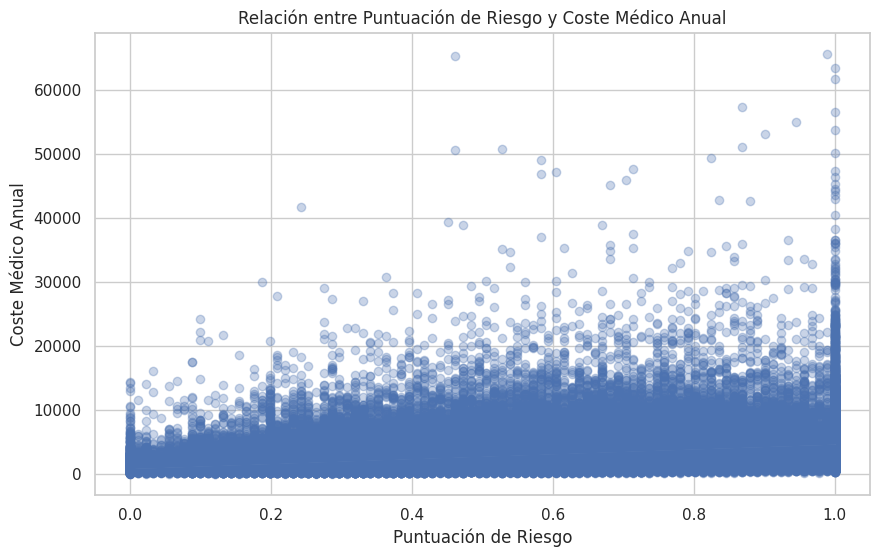

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x="risk_score", y="annual_medical_cost", scatter_kws={'alpha':0.3})
plt.title('Relación entre Puntuación de Riesgo y Coste Médico Anual')
plt.xlabel('Puntuación de Riesgo')
plt.ylabel('Coste Médico Anual')
plt.show()

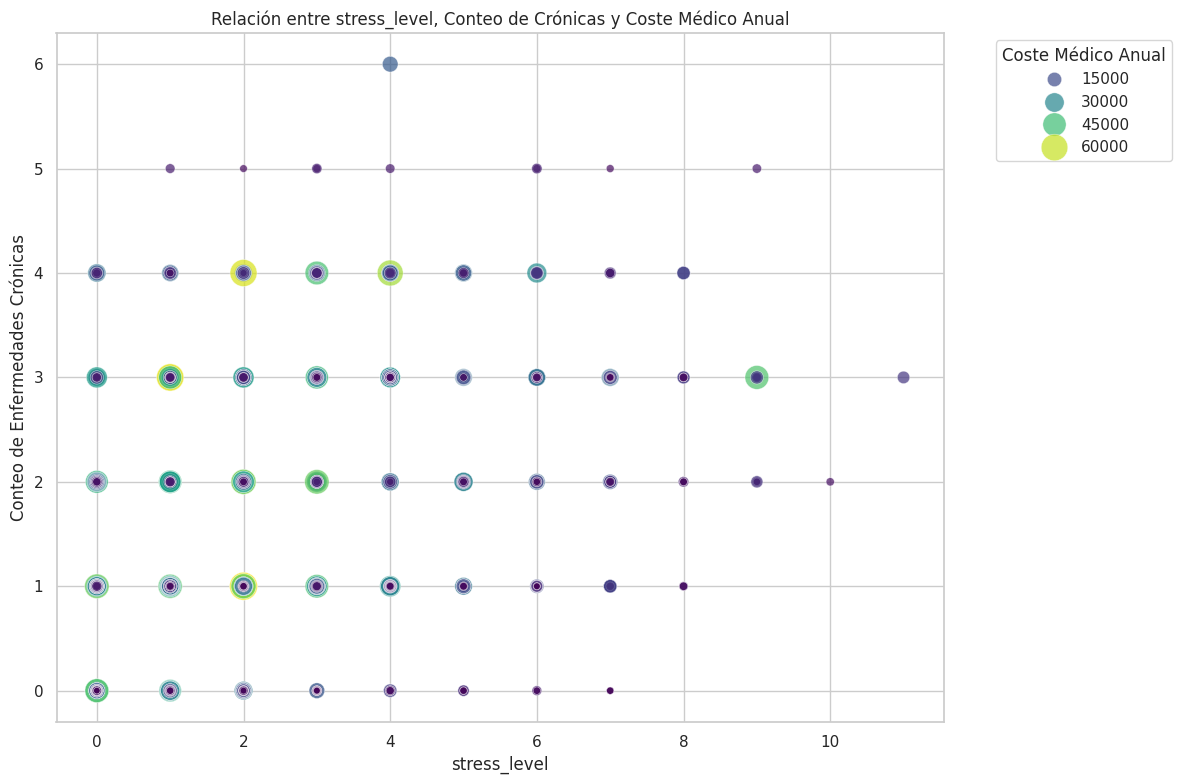

In [28]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x="medication_count",
    y="chronic_count",
    hue="annual_medical_cost",
    palette="viridis",
    size="annual_medical_cost",
    sizes=(20, 400),
    alpha=0.7
)

plt.title('Relación entre stress_level, Conteo de Crónicas y Coste Médico Anual')
plt.xlabel('stress_level')
plt.ylabel('Conteo de Enfermedades Crónicas')
plt.legend(title='Coste Médico Anual', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, '4. Coste Anual por Frecuencia de Visitas Médicas')

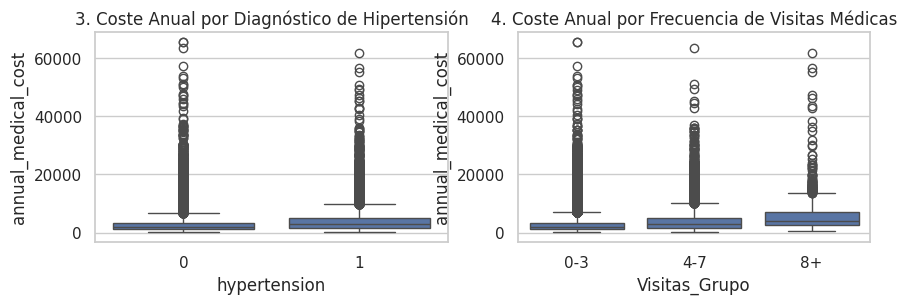

In [67]:

plt.subplot(2, 2, 3)
sns.boxplot(x='hypertension', y='annual_medical_cost', data=df)
plt.title('3. Coste Anual por Diagnóstico de Hipertensión')

plt.subplot(2, 2, 4)
df['Visitas_Grupo'] = pd.cut(df['visits_last_year'], bins=[-1, 3, 7, 100], labels=['0-3', '4-7', '8+'])
sns.boxplot(x='Visitas_Grupo', y='annual_medical_cost', data=df)
plt.title('4. Coste Anual por Frecuencia de Visitas Médicas')

# MODELO

Modelo entrenado. Coeficiente R^2: 0.1263

--- DASHBOARD (4 Gráficos) ---


/tmp/ipython-input-60936163.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=top_coeffs, palette='coolwarm')


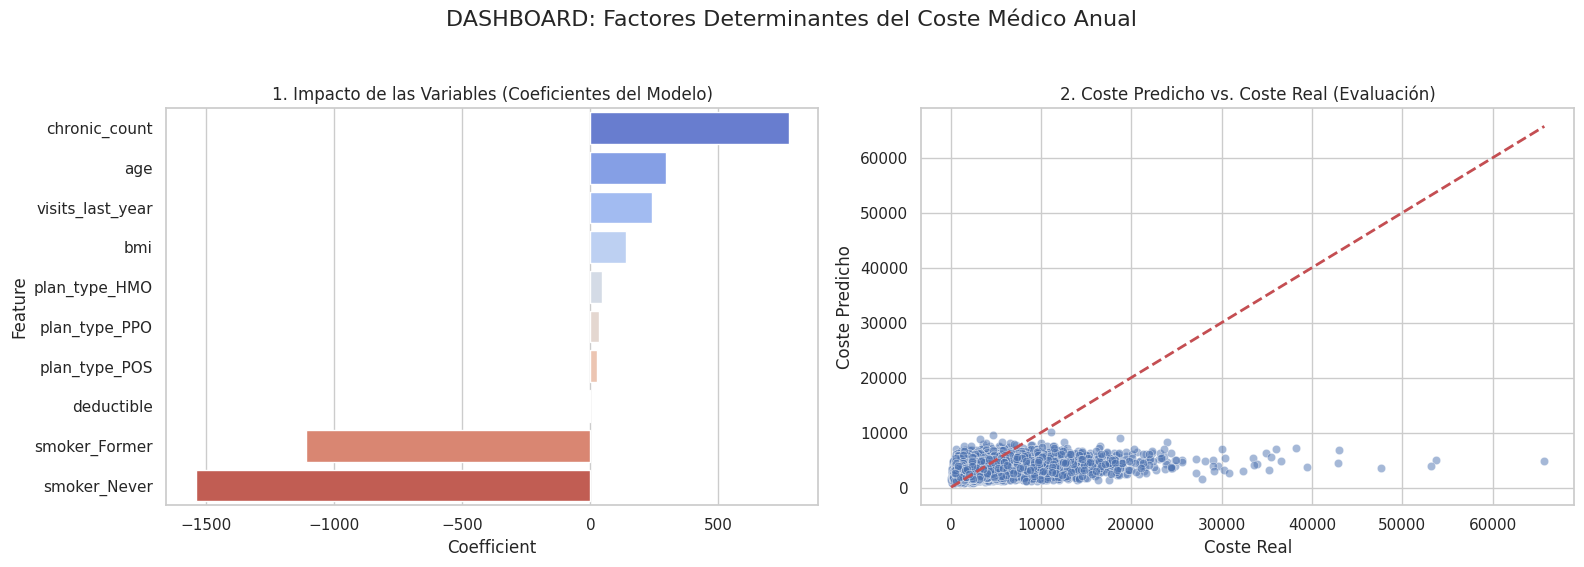

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

features = [
    'age', 'bmi', 'smoker', 'chronic_count',
    'plan_type', 'deductible', 'visits_last_year'
]
X = df[features].copy()
y = df['annual_medical_cost']

X = pd.get_dummies(X, drop_first=True)

scaler_reg = StandardScaler()
cols_to_scale = X.select_dtypes(include=np.number).columns.tolist()
X[cols_to_scale] = scaler_reg.fit_transform(X[cols_to_scale])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluación
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"Modelo entrenado. Coeficiente R^2: {r2:.4f}")

# 5. Extracción de Coeficientes (para el Dashboard)
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)


print("\n--- DASHBOARD (4 Gráficos) ---")
plt.figure(figsize=(16, 10))
plt.suptitle('DASHBOARD: Factores Determinantes del Coste Médico Anual', fontsize=16)

plt.subplot(2, 2, 1)
top_coeffs = pd.concat([
    coefficients_df.head(5),
    coefficients_df.tail(5)
])
sns.barplot(x='Coefficient', y='Feature', data=top_coeffs, palette='coolwarm')
plt.title('1. Impacto de las Variables (Coeficientes del Modelo)')

plt.subplot(2, 2, 2)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
# Línea y=x ideal
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('2. Coste Predicho vs. Coste Real (Evaluación)')
plt.xlabel('Coste Real')
plt.ylabel('Coste Predicho')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# DASHBOARD

/tmp/ipython-input-3528702234.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


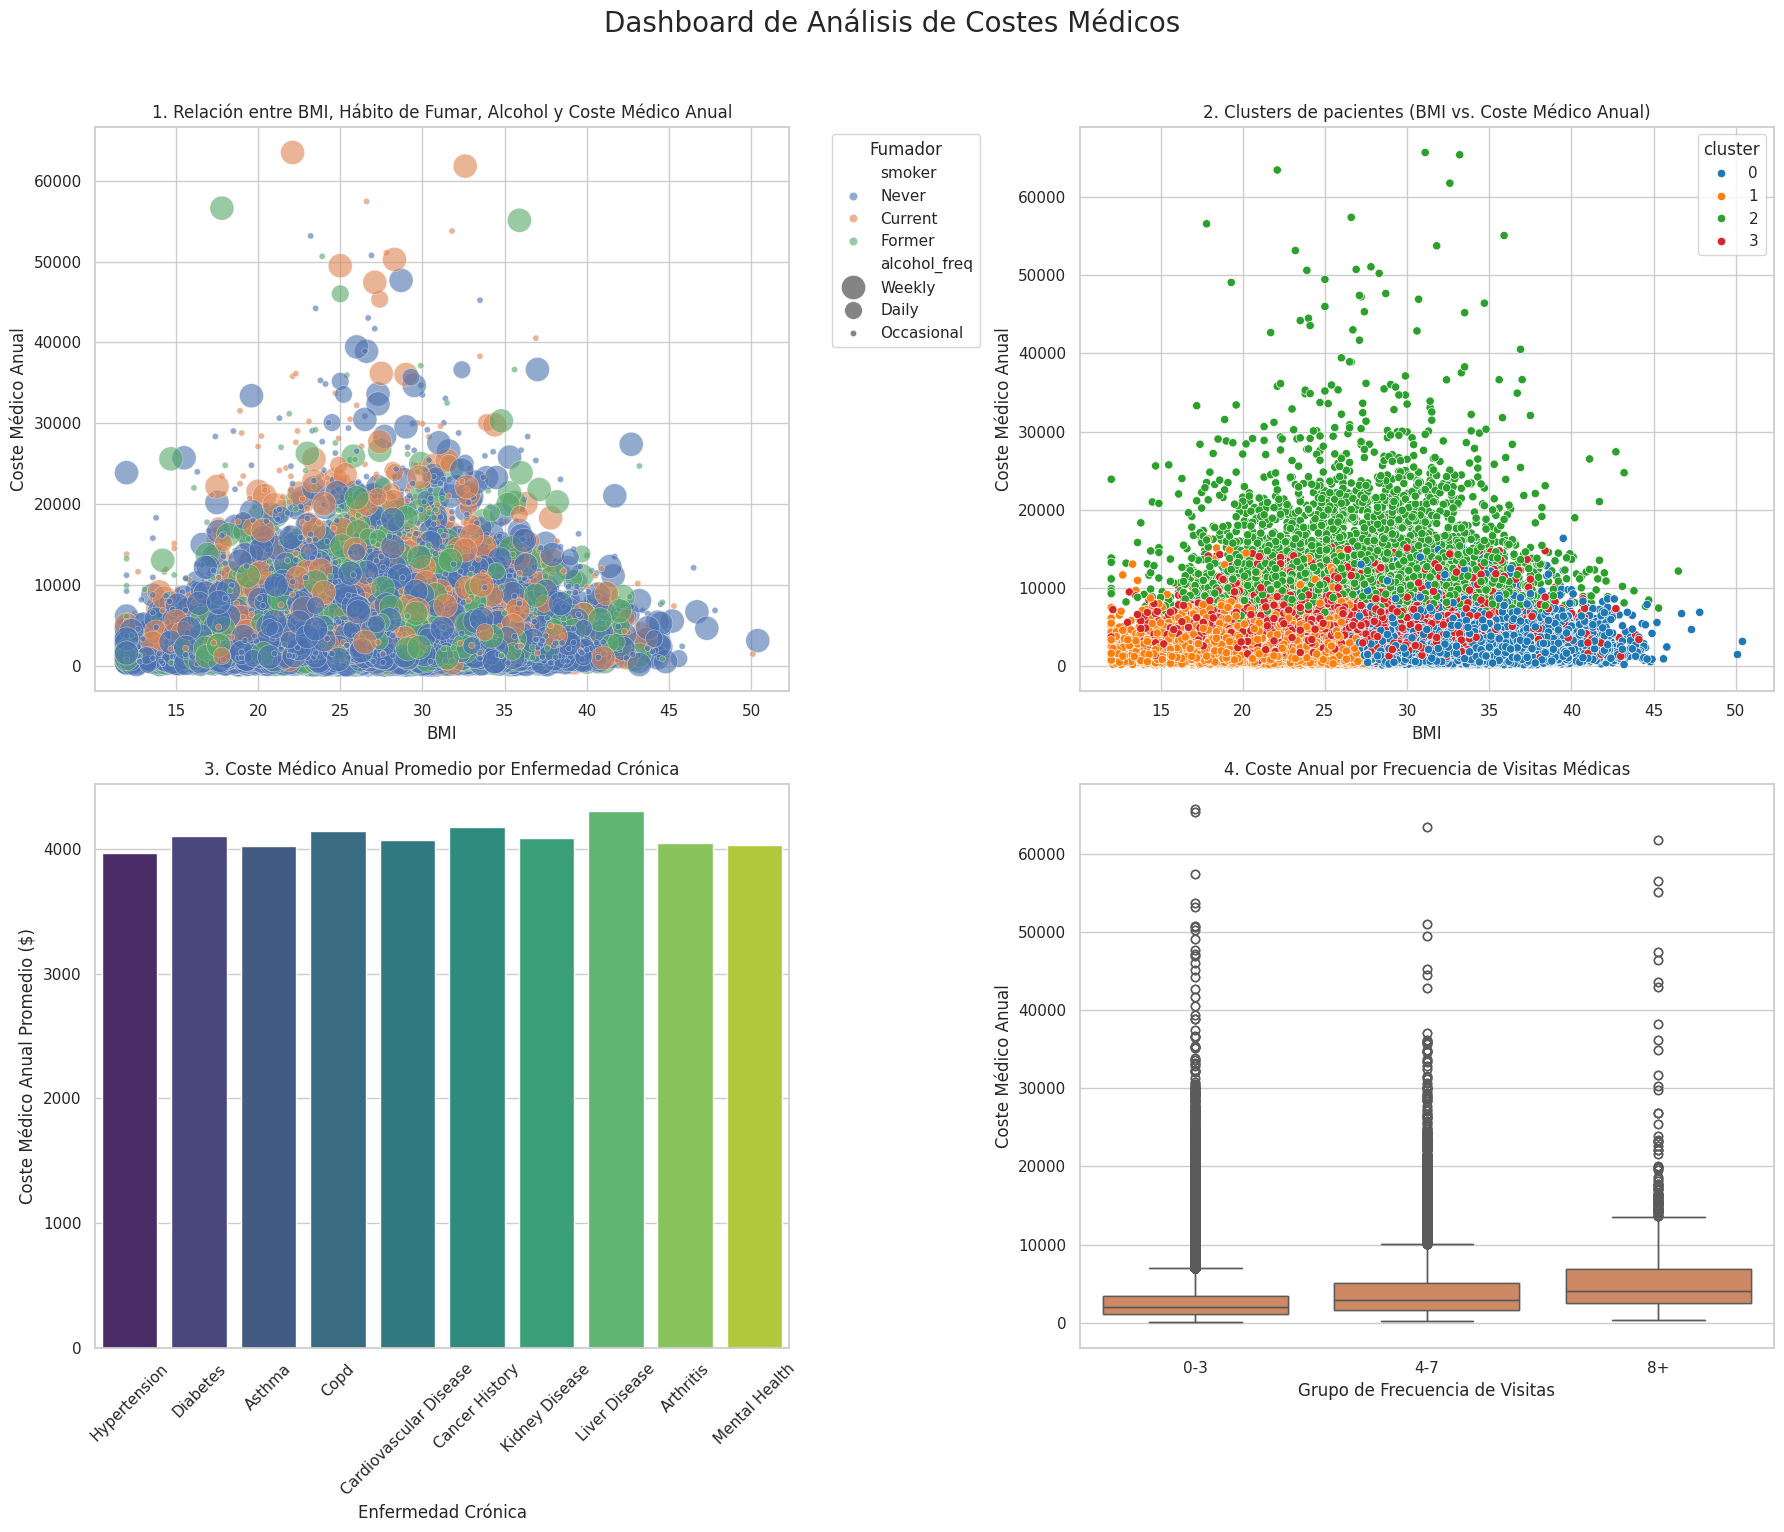

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

cluster_vars = ["age", "bmi", "chronic_count", "annual_medical_cost", "total_claims_paid"]

if all(col in df.columns for col in cluster_vars):
    df_cluster = df[cluster_vars].copy()

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_cluster)

    kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
    df["cluster"] = kmeans.fit_predict(X_scaled)
else:
if 'visits_last_year' in df.columns:
    df['Visitas_Grupo'] = pd.cut(df['visits_last_year'], bins=[-1, 3, 7, 100], labels=['0-3', '4-7', '8+'])
else:
    print("Advertencia: No se pudo crear el grupo de visitas. Asegúrate de que la columna 'visits_last_year' existe.")
fig, axes = plt.subplots(2, 2, figsize=(18, 15))
fig.suptitle('Dashboard de Análisis de Costes Médicos', fontsize=20, y=1.02)

sns.scatterplot(
    data=df,
    x="bmi",
    y="annual_medical_cost",
    hue="smoker",
    size="alcohol_freq",
    sizes=(20, 300),
    alpha=0.6,
    ax=axes[0, 0]
)
axes[0, 0].set_title("1. Relación entre BMI, Hábito de Fumar, Alcohol y Coste Médico Anual")
axes[0, 0].set_xlabel("BMI")
axes[0, 0].set_ylabel("Coste Médico Anual")
# Se ajusta la leyenda para el subplot
axes[0, 0].legend(title="Fumador", bbox_to_anchor=(1.05, 1), loc="upper left")

sns.boxplot(
    x='Visitas_Grupo',
    y='annual_medical_cost',
    data=df,
    ax=axes[1, 1]
)
axes[1, 1].set_title('4. Coste Anual por Frecuencia de Visitas Médicas')
axes[1, 1].set_xlabel('Grupo de Frecuencia de Visitas')
axes[1, 1].set_ylabel('Coste Médico Anual')

# --- GRÁFICO 3

if 'average_costs_per_disease' in locals() or 'average_costs_per_disease' in globals():
    diseases = [disease.replace('_', ' ').title() for disease in average_costs_per_disease.keys()]
    costs = list(average_costs_per_disease.values())

    sns.barplot(
        x=diseases,
        y=costs,
        palette='viridis',
        ax=axes[1, 0]
    )
    axes[1, 0].set_title('3. Coste Médico Anual Promedio por Enfermedad Crónica')
    axes[1, 0].set_xlabel('Enfermedad Crónica')
    axes[1, 0].set_ylabel('Coste Médico Anual Promedio ($)')
    axes[1, 0].tick_params(axis='x', rotation=45)

sns.boxplot(
    x='Visitas_Grupo',
    y='annual_medical_cost',
    data=df,
    ax=axes[1, 1]
)
axes[1, 1].set_title('4. Coste Anual por Frecuencia de Visitas Médicas')
axes[1, 1].set_xlabel('Grupo de Frecuencia de Visitas')
axes[1, 1].set_ylabel('Coste Médico Anual')
# --- GRÁFICO 2
sns.scatterplot(
    data=df,
    x="bmi",
    y="annual_medical_cost",
    hue="cluster",
    palette="tab10",
    ax=axes[0, 1]
)
axes[0, 1].set_title("2. Clusters de pacientes (BMI vs. Coste Médico Anual)")
axes[0, 1].set_xlabel("BMI")
axes[0, 1].set_ylabel("Coste Médico Anual")

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()